**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

 [1] "region.summary.encode_chipseq_flagship.tsv"    
 [2] "region.summary.encode_chipseq_histone.tsv"     
 [3] "region.summary.encode_chipseq_subset.tsv"      
 [4] "region.summary.encode_chromatin_states.tsv"    
 [5] "region.summary.fcc_astarr_csaw.tsv"            
 [6] "region.summary.fcc_crispri_hcrff.tsv"          
 [7] "region.summary.genome_tss.tsv"                 
 [8] "region.summary.hic_insitu_K562_ENCSR545YBD.tsv"
 [9] "region.summary.hic_intact_K562_deep.tsv"       
[10] "region.summary.hic_intact_K562_ENCSR479XDG.tsv"


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.encode_chipseq_histone.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath)
dat_region_import = dat
print(dim(dat))
head(dat)

Rows: 511609 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): Chrom_A, Region_A, Annotation_A, Annotation_B, Group_B, Label_B, Re...
dbl (3): ChromStart_A, ChromEnd_A, Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 511609     10


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Annotation_A,Annotation_B,Group_B,Label_B,Region_B,Count
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,chipseq_H3K36me3_ENCFF193ERO,ChIP-seq; Histone,H3K36me3,chr1:16092-16380,1
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,chipseq_H3K36me3_ENCFF561OUZ,ChIP-seq; Histone,H3K36me3,chr1:16209-16339,1
chr1,137748,138049,chr1:137748-138049,fcc_astarr_macs_input_overlap,chipseq_H3K27ac_ENCFF544LXB,ChIP-seq; Histone,H3K27ac,chr1:137650-138169,1
chr1,137748,138049,chr1:137748-138049,fcc_astarr_macs_input_overlap,chipseq_H3K4me2_ENCFF749KLQ,ChIP-seq; Histone,H3K4me2,chr1:137654-138013,1
chr1,137748,138049,chr1:137748-138049,fcc_astarr_macs_input_overlap,chipseq_H3K4me3_ENCFF122CSI,ChIP-seq; Histone,H3K4me3,chr1:137633-138169,1
chr1,137748,138049,chr1:137748-138049,fcc_astarr_macs_input_overlap,chipseq_H3K4me3_ENCFF689QIJ,ChIP-seq; Histone,H3K4me3,chr1:137660-138147,1


In [4]:
dat = dat_region_import
dat = dat %>% 
    dplyr::group_by(Chrom_A, ChromStart_A, ChromEnd_A, Region_A, Label_B) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

dat_region_arrange = dat
print(dim(dat))
head(dat)

[1] 384749      6


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Label_B,Count
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
chr1,16025,16338,chr1:16025-16338,H3K36me3,2
chr1,137748,138049,chr1:137748-138049,H3K27ac,1
chr1,137748,138049,chr1:137748-138049,H3K4me2,1
chr1,137748,138049,chr1:137748-138049,H3K4me3,4
chr1,137748,138049,chr1:137748-138049,H3K79me2,1
chr1,137748,138049,chr1:137748-138049,H3K9ac,2


In [23]:
dat = dat_region_arrange
dat = dat %>% 
    dplyr::filter(Chrom_A == "chrX") %>% 
    dplyr::mutate(Value = 1) %>%
    dplyr::select(-Count) %>%
    dplyr::distinct() 

dat_region_subset = dat
head(dat)

Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Label_B,Value
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
chrX,19497,20820,chrX:19497-20820,H2AFZ,1
chrX,19497,20820,chrX:19497-20820,H3K4me1,1
chrX,19497,20820,chrX:19497-20820,H3K4me2,1
chrX,19497,20820,chrX:19497-20820,H3K4me3,1
chrX,19497,20820,chrX:19497-20820,H3K9ac,1
chrX,95163,95655,chrX:95163-95655,H2AFZ,1


In [31]:
### init
dat = dat_region_subset

###
dat = dat %>% dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)
vec = unique(dat$Region_A)
vec_txt_region_A = vec

###
tmp = data.frame(Region_A = vec, Index_A = 1:length(vec))
dat = dat %>% dplyr::left_join(tmp, by="Region_A")

###
mat = dat %>% 
    tidyr::spread(Label_B, Value) %>%
    replace(is.na(.), 0)
vec = mat$Index_A
mat = mat %>% dplyr::select(-dplyr::contains(c("Chrom", "Region", "Index")))
res = apply(mat, 2, function(x){
    num = cor(x, vec, method = "spearman")
    return(num)
})

###
vec = names(sort(res))
vec_txt_label_B = vec

###
dat = dat %>% 
    dplyr::mutate(
        Region_A = factor(Region_A, levels = rev(vec_txt_region_A)),
        Label_B  = factor(Label_B,  levels =  vec_txt_label_B)
    ) 

### assign and show
dat_region_ordered = dat
print(dim(dat))
head(dat)

[1] 8757    7


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Label_B,Value,Index_A
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<int>
chrX,19497,20820,chrX:19497-20820,H2AFZ,1,1
chrX,19497,20820,chrX:19497-20820,H3K4me1,1,1
chrX,19497,20820,chrX:19497-20820,H3K4me2,1,1
chrX,19497,20820,chrX:19497-20820,H3K4me3,1,1
chrX,19497,20820,chrX:19497-20820,H3K9ac,1,1
chrX,95163,95655,chrX:95163-95655,H2AFZ,1,2


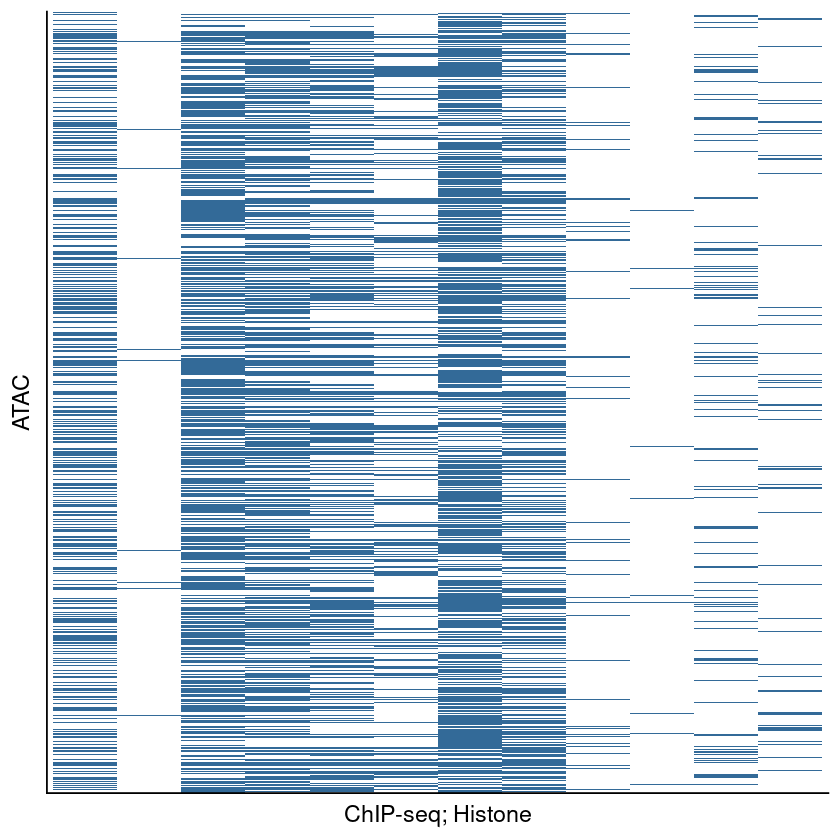

In [32]:
gpt = ggplot(dat, aes(x=Label_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="ChIP-seq; Histone", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )
print(gpt)

In [53]:
### init
dat = dat_region_subset
dat = dat %>% dplyr::mutate(Label_B = paste("chipseq", Label_B, sep="_"))

mat = dat %>% 
    tidyr::spread(Label_B, Value) %>%
    dplyr::arrange(pick(starts_with("chipseq")))

vec_txt_region_A = unique(mat$Region_A)

In [54]:
dat = dat_region_subset
dat = dat %>% dplyr::mutate(Label_B = paste("chipseq", Label_B, sep="_"))

res = as.data.frame(table(dat$Label_B))
res = res %>% dplyr::arrange(-Freq)

vec_txt_label_B = res$Var1

In [55]:
dat = dat_region_subset
dat = dat %>% dplyr::mutate(Label_B = paste("chipseq", Label_B, sep="_"))

dat = dat %>% 
    dplyr::mutate(
        Region_A = factor(Region_A, levels = rev(vec_txt_region_A)),
        Label_B  = factor(Label_B,  levels =  vec_txt_label_B)
    ) 

### assign and show
dat_region_ordered = dat
print(dim(dat))
head(dat)

[1] 8757    6


Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Label_B,Value
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
chrX,19497,20820,chrX:19497-20820,chipseq_H2AFZ,1
chrX,19497,20820,chrX:19497-20820,chipseq_H3K4me1,1
chrX,19497,20820,chrX:19497-20820,chipseq_H3K4me2,1
chrX,19497,20820,chrX:19497-20820,chipseq_H3K4me3,1
chrX,19497,20820,chrX:19497-20820,chipseq_H3K9ac,1
chrX,95163,95655,chrX:95163-95655,chipseq_H2AFZ,1


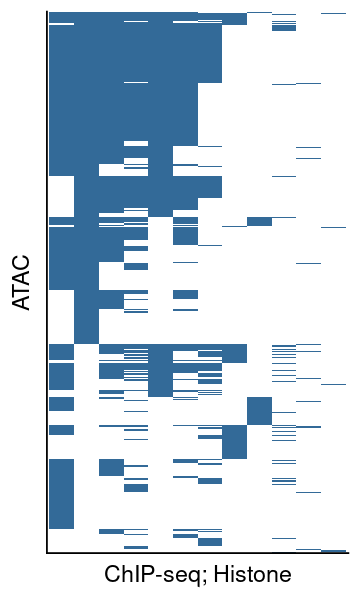

In [59]:
gpt = ggplot(dat, aes(x=Label_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="ChIP-seq; Histone", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )

options(repr.plot.height = 5, repr.plot.width = 3)
print(gpt)

In [ ]:
### init
dat = dat_region_subset

###
dat = dat %>% dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)
vec = unique(dat$Region_A)
vec_txt_region_A = vec

###
tmp = data.frame(Region_A = vec, Index_A = 1:length(vec))
dat = dat %>% dplyr::left_join(tmp, by="Region_A")

###
mat = dat %>% 
    tidyr::spread(Label_B, Value) %>%
    replace(is.na(.), 0)
vec = mat$Index_A
mat = mat %>% dplyr::select(-dplyr::contains(c("Chrom", "Region", "Index")))
res = apply(mat, 2, function(x){
    num = cor(x, vec, method = "spearman")
    return(num)
})

###
vec = names(sort(res))
vec_txt_label_B = vec

###
dat = dat %>% 
    dplyr::mutate(
        Region_A = factor(Region_A, levels = rev(vec_txt_region_A)),
        Label_B  = factor(Label_B,  levels =  vec_txt_label_B)
    ) 

### assign and show
dat_region_ordered = dat
print(dim(dat))
head(dat)

In [27]:
dat = dat_region_subset
dat = dat %>% 
    dplyr::filter(Chrom_A == "chrX") %>% 
    dplyr::mutate(Value = 1) %>%
    dplyr::distinct() 

dat = dat %>%
    dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)
vec = unique(dat$Region_A)
tmp = data.frame(Region_A = vec, Index_A = 1:length(vec))

dat = dat %>% dplyr::mutate(Region_A = factor(Region_A, levels=rev(vec))) 
dat = dat %>% dplyr::left_join(tmp, by="Region_A")

tmp = dat %>% 
    dplyr::group_by(Label_B) %>%
    dplyr::summarise(
        Index_B = min(Index_A),
        .groups = "drop"
    ) %>%
    dplyr::arrange(Index_B)
vec = tmp$Label_B

dat = dat %>% dplyr::mutate(Label_B = factor(Label_B, levels=vec))


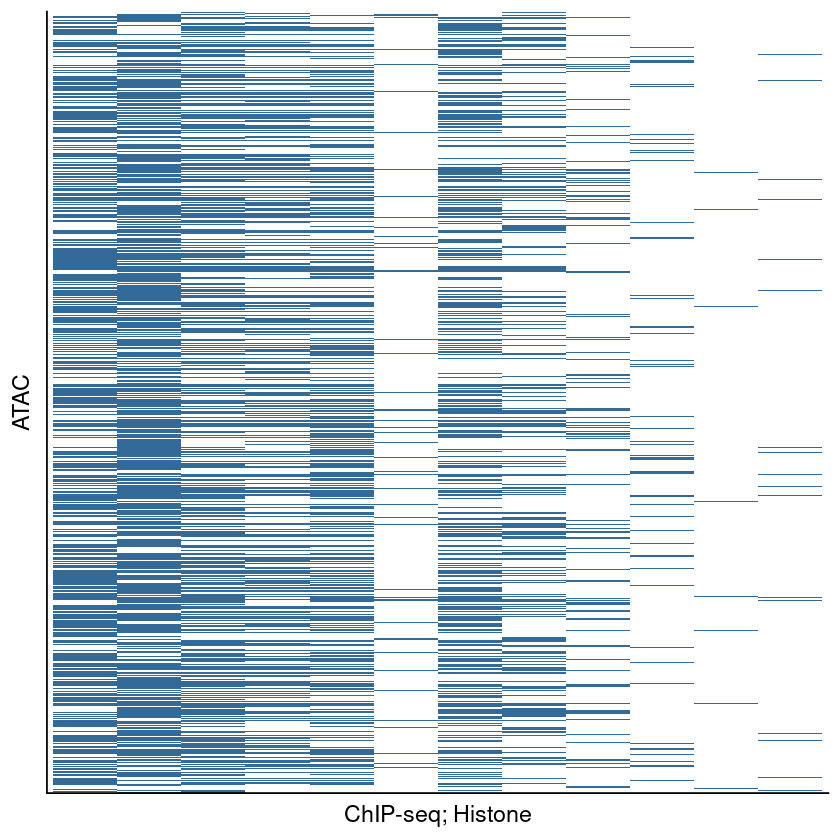

In [28]:
gpt = ggplot(dat, aes(x=Label_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="ChIP-seq; Histone", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )
print(gpt)